In [41]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Melihat informasi data set

In [24]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<Axes: >

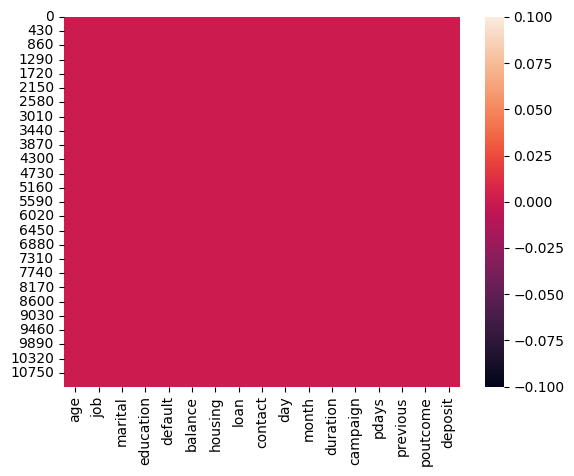

In [15]:
sns.heatmap(data.isnull())

## Indentifikasi dan menghapus data yang tidak di perlukan

In [30]:
data.drop(['contact', 'day', 'month', 'pdays', 'default', 'previous'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   duration   11162 non-null  int64 
 8   campaign   11162 non-null  int64 
 9   poutcome   11162 non-null  object
 10  deposit    11162 non-null  object
dtypes: int64(4), object(7)
memory usage: 959.4+ KB


In [31]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'poutcome', 'deposit'],
      dtype='object')


# Menangani Nilao "Unknown"

In [32]:
for col in ['job', 'marital', 'education', 'housing', 'loan', 'poutcome']:
    data[col] = data[col].replace('unknown', data[col].mode()[0])
data.head()


,age,job,marital,education,balance,housing,loan,duration,campaign,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,1042,1,unknown,yes
1,56,admin.,married,secondary,45,no,no,1467,1,unknown,yes
2,41,technician,married,secondary,1270,yes,no,1389,1,unknown,yes
3,55,services,married,secondary,2476,yes,no,579,1,unknown,yes
4,54,admin.,married,tertiary,184,no,no,673,2,unknown,yes


In [33]:
data_encoded = pd.get_dummies(data, columns=['job', 'marital', 'education', 'housing', 'loan', 'poutcome'], drop_first=True)
data_encoded.head()


,age,balance,duration,campaign,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,1042,1,yes,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,True
1,56,45,1467,1,yes,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,True
2,41,1270,1389,1,yes,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,True
3,55,2476,579,1,yes,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,True
4,54,184,673,2,yes,False,False,False,False,False,...,False,True,False,False,True,False,False,False,False,True


# Memisah Data set

In [34]:
X = data_encoded.drop('deposit', axis=1)
y = data_encoded['deposit']

y = y.map({'yes': 1, 'no': 0})


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [40]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=5000)

## Evaluasi Model

In [42]:
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.794266945356823
Confusion Matrix:
 [[1485  283]
 [ 406 1175]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      1768
           1       0.81      0.74      0.77      1581

    accuracy                           0.79      3349
   macro avg       0.80      0.79      0.79      3349
weighted avg       0.80      0.79      0.79      3349

